In [1]:
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pip install ../

# Example for Limber projected spectra
We show here to compute projected spectra with the halo model

## Defining the model
See `exampleHalomodelIngredients.ipynb` for details


In [3]:
# Cosmology
cosmo = {
    'Om_c': 0.3156,
    'Om_b': 0.0492,
    'h': 0.6727,
    'sigma_8': 0.831,
    'n_s': 0.9645
}

# Halo mass function
hmf=ccl.halos.MassFuncSheth99()

# Halo bias
hbf=ccl.halos.HaloBiasSheth01()

# Concentration mass Relation
cmfunc=ccl.halos.ConcentrationDuffy08()


# HOD
# HOD parameters
alpha=1
sigma=0.2
Mth=1e12
Mprime=20*Mth
beta=1

# Correlation between galaxy populations
A=0 # 0 ==> No correlation between populations
epsilon=0

# Scaling of halo profile concentration
flens=1 # 1 ==> Same as dark matter

# Get HOD
hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

# Define model
model = g3lhalo.halomodel(verbose=True, cosmo=cosmo, hmfunc=hmf, hbfunc=hbf, cmfunc=cmfunc)
model.set_hods(hod_cen, hod_sat, A=A, epsilon=epsilon, flens1=flens, flens2=flens)




Setting cosmology
Om_c: 0.3156
Om_b: 0.0492
h: 0.6727
sigma_8: 0.831
n_s: 0.9645
Also setting linear matter power spectrum
Setting halo mass function
Setting halo bias function
Setting concentration mass relation


## Defining source and lens redshift distributions

We define here a lens and source $n(z)$, which are both Gaussian centered on two different redshifts

In [4]:
zs=np.linspace(0.2, 1.5)

n_sources=np.exp(-(zs-1)**2/0.2**2)
n_lenses=np.exp(-(zs-0.5)**2/0.2**2)

n_sources/=(np.sum(n_sources)*(zs[1]-zs[0]))
n_lenses/=(np.sum(n_lenses)*(zs[1]-zs[0]))


Text(0, 0.5, '$n(z)$')

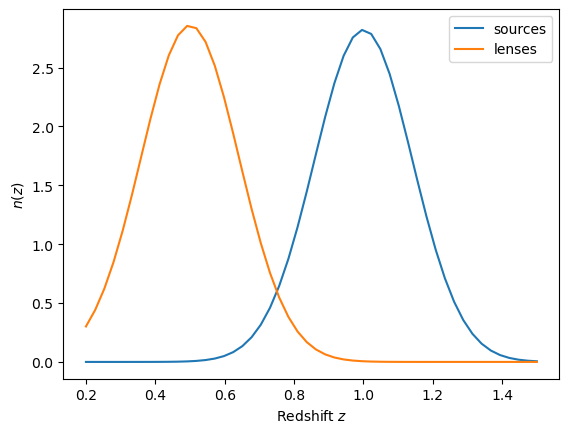

In [5]:

plt.plot(zs, n_sources, label="sources")

plt.plot(zs, n_lenses, label='lenses')


plt.legend()
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"$n(z)$")

## Defining `projectedSpectra` object

We initialize now the `projectedSpectra` object, which does the calculations

In [6]:
projection=g3lhalo.projectedSpectra(model)

projection.set_nz_lenses(zs, n_lenses)
projection.set_nz_sources(zs, n_sources)

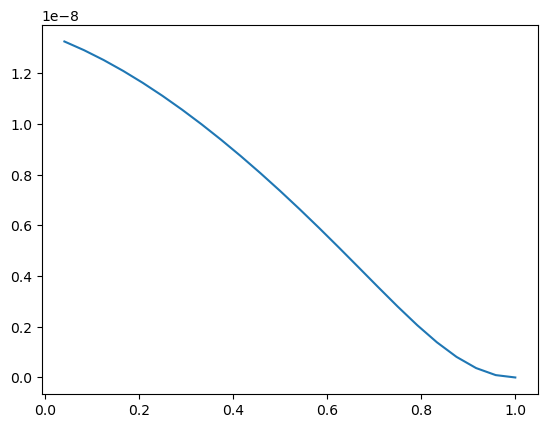

In [7]:
plt.plot(projection.zs, projection.gs)

## Calculate Power spectra

In [8]:
ells=np.geomspace(1, 1000, 10)

# convergence-convergence
C_kk_1h, C_kk_2h, C_kk=projection.C_kk(ells)

# convergence-galaxies
C_kg_1h, C_kg_2h, C_kg=projection.C_kg(ells, 1)

# galaxies-galaxies
C_gg_1h, C_gg_2h, C_gg=projection.C_gg(ells, 1, 1)

[]

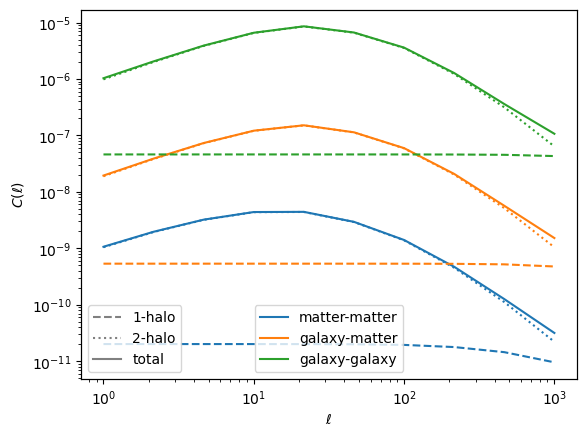

In [ ]:

fig, axes=plt.subplots()


axes.loglog(ells, C_kk_1h, color='C0', ls='--')
axes.loglog(ells, C_kk_2h, color='C0', ls=':')
axes.loglog(ells, C_kk, color='C0', label='matter-matter')


axes.loglog(ells, C_kg_1h, color='C1', ls='--')
axes.loglog(ells, C_kg_2h, color='C1', ls=':') 
axes.loglog(ells, C_kg, color='C1', label='galaxy-matter')

axes.loglog(ells, C_gg_1h, color='C2', ls='--')
axes.loglog(ells, C_gg_2h, color='C2', ls=':')
axes.loglog(ells, C_gg, color='C2', label='galaxy-galaxy')


plt.xlabel(r'$\ell$')
plt.ylabel(r'$C(\ell)$')


ax2=axes.twinx()
ax2.plot(np.nan, np.nan, ls='--', label='1-halo', color='grey')
ax2.plot(np.nan, np.nan, ls=':', label='2-halo', color='grey')
ax2.plot(np.nan, np.nan, ls='-', label='total', color='grey')



axes.legend()
ax2.legend(loc='lower left')
ax2.set_yticks([])

#axes.set_xlim(1,1e3)
#axes.set_ylim(3e-10, 6e-8)

## Calculate Bispectra

In [11]:
# Matter-Galaxy-Galaxy

B1h_sll=[]
B2h_sll=[]
B3h_sll=[]
B_sll=[]

for ell in ells:
    B1h, B2h, B3h, B = projection.C_kgg(ell, ell, ell, 1, 1)
    B1h_sll.append(B1h)
    B2h_sll.append(B2h)
    B3h_sll.append(B3h)
    B_sll.append(B)

B1h_sll=np.array(B1h_sll)
B2h_sll=np.array(B2h_sll)
B3h_sll=np.array(B3h_sll)
B_sll=np.array(B_sll)

In [12]:
# Matter-Matter-Galaxy

B1h_ssl=[]
B2h_ssl=[]
B3h_ssl=[]
B_ssl=[]

for ell in ells:
    B1h, B2h, B3h, B = projection.C_kkg(ell, ell, ell, 1)
    B1h_ssl.append(B1h)
    B2h_ssl.append(B2h)
    B3h_ssl.append(B3h)
    B_ssl.append(B)

B1h_ssl=np.array(B1h_ssl)
B2h_ssl=np.array(B2h_ssl)
B3h_ssl=np.array(B3h_ssl)
B_ssl=np.array(B_ssl)

In [13]:
# Matter-Matter-Galaxy

B1h_sss=[]
B2h_sss=[]
B3h_sss=[]
B_sss=[]

for ell in ells:
    B1h, B2h, B3h, B = projection.C_kkk(ell, ell, ell)
    B1h_sss.append(B1h)
    B2h_sss.append(B2h)
    B3h_sss.append(B3h)
    B_sss.append(B)

B1h_sss=np.array(B1h_sss)
B2h_sss=np.array(B2h_sss)
B3h_sss=np.array(B3h_sss)
B_sss=np.array(B_sss)

(1, 1000.0)

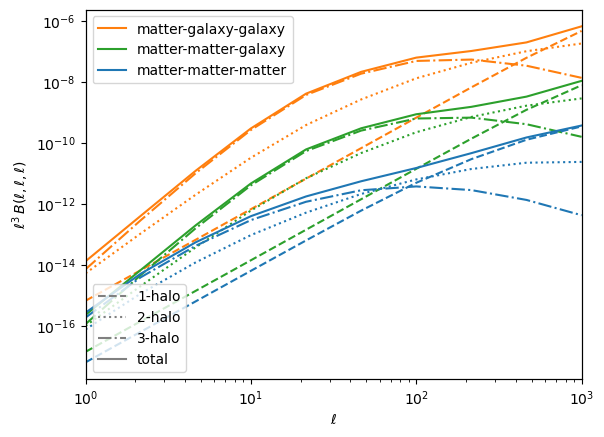

In [15]:

fig, axes=plt.subplots()


axes.loglog(ells, ells**3*B1h_sll, color='C1', ls='--')
axes.loglog(ells, ells**3*B2h_sll, color='C1', ls=':')
axes.loglog(ells, ells**3*B3h_sll, color='C1', ls='-.')
axes.loglog(ells, ells**3*B_sll, color='C1', label='matter-galaxy-galaxy')


axes.loglog(ells, ells**3*B1h_ssl, color='C2', ls='--')
axes.loglog(ells, ells**3*B2h_ssl, color='C2', ls=':')
axes.loglog(ells, ells**3*B3h_ssl, color='C2', ls='-.')
axes.loglog(ells, ells**3*B_ssl, color='C2', label='matter-matter-galaxy')


axes.loglog(ells, ells**3*B1h_sss, color='C0', ls='--')
axes.loglog(ells, ells**3*B2h_sss, color='C0', ls=':')
axes.loglog(ells, ells**3*B3h_sss, color='C0', ls='-.')
axes.loglog(ells, ells**3*B_sss, color='C0', label='matter-matter-matter')


plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell^3\,B(\ell, \ell, \ell)$')


ax2=axes.twinx()
ax2.plot(np.nan, np.nan, ls='--', label='1-halo', color='grey')
ax2.plot(np.nan, np.nan, ls=':', label='2-halo', color='grey')
ax2.plot(np.nan, np.nan, ls='-.', label='3-halo', color='grey')

ax2.plot(np.nan, np.nan, ls='-', label='total', color='grey')



axes.legend()
ax2.legend(loc='lower left')
ax2.set_yticks([])

axes.set_xlim(1,1e3)
#axes.set_ylim(5e-3, 5e5)